In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
df=pd.read_csv(r"C:\yeraki vachuruken\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [221]:
#Data Clening
df.drop_duplicates()
df['sex']=df['sex'].replace({1:'Male',0:'Female'})
df['cp']=df['cp'].replace({0:'No',1:'Yes'})
df['exang']=df['exang'].replace({0:'No',1:'Yes'})
df['fbs']=df['fbs'].replace({0:'No',1:'Yes'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,No,125,212,No,1,168,No,1.0,2,2,3,0
1,53,Male,No,140,203,Yes,0,155,Yes,3.1,0,0,3,0
2,70,Male,No,145,174,No,1,125,Yes,2.6,0,0,3,0
3,61,Male,No,148,203,No,1,161,No,0.0,2,1,3,0
4,62,Female,No,138,294,Yes,1,106,No,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Yes,140,221,No,1,164,Yes,0.0,2,0,2,1
1021,60,Male,No,125,258,No,0,141,Yes,2.8,1,1,3,0
1022,47,Male,No,110,275,No,0,118,Yes,1.0,1,1,2,0
1023,50,Female,No,110,254,No,0,159,No,0.0,2,0,2,1


In [94]:
#Outliners
df['zscore']=(df['chol']-df['chol'].mean())/df['chol'].std()
outliers_z = df[(df['zscore'] > 3) | (df['zscore'] < -3)] 
print(outliers_z)

     age     sex  cp  trestbps  chol  fbs  restecg  thalach exang  oldpeak  \
123   65  Female   2       140   417    1        0      157    No      0.8   
158   67  Female   2       115   564    0        0      160    No      1.6   
179   56  Female  No       134   409    0        0      150   Yes      1.9   
192   67  Female   2       115   564    0        0      160    No      1.6   
450   63  Female  No       150   407    0        0      154    No      4.0   
464   67  Female   2       115   564    0        0      160    No      1.6   
481   63  Female  No       150   407    0        0      154    No      4.0   
641   56  Female  No       134   409    0        0      150   Yes      1.9   
665   65  Female   2       140   417    1        0      157    No      0.8   
685   63  Female  No       150   407    0        0      154    No      4.0   
889   63  Female  No       150   407    0        0      154    No      4.0   
958   65  Female   2       140   417    1        0      157    N

In [120]:
#EDA
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,zscore
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1.025000e+03
mean,54.434146,131.611707,246.00000,0.149268,0.529756,149.114146,1.071512,1.385366,0.754146,2.323902,-1.039819e-17
std,9.072290,17.516718,51.59251,0.356527,0.527878,23.005724,1.175053,0.617755,1.030798,0.620660,1.000000e+00
min,29.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,-2.325919e+00
25%,48.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000,-6.783930e-01
50%,56.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.800000,1.000000,0.000000,2.000000,-1.162960e-01
75%,61.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.800000,2.000000,1.000000,3.000000,5.620971e-01
max,77.000000,200.000000,564.00000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,6.163685e+00


In [126]:
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
 14  zscore    1025 non-null   float64
dtypes: float64(2), int64(9), object(4)
memory usage: 120.2+ KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
zscore      0
dtype: int64

<Axes: ylabel='Frequency'>

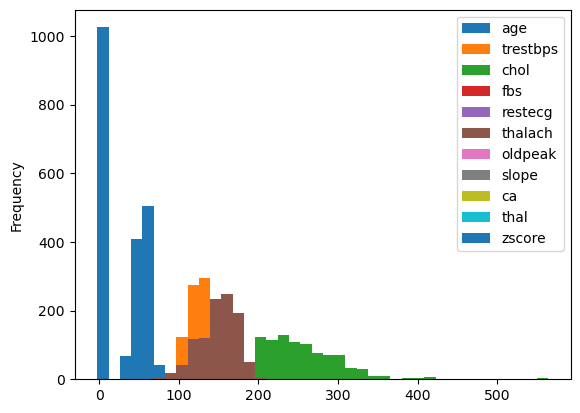

In [139]:
#Visualization
df.plot.hist(bins=40)

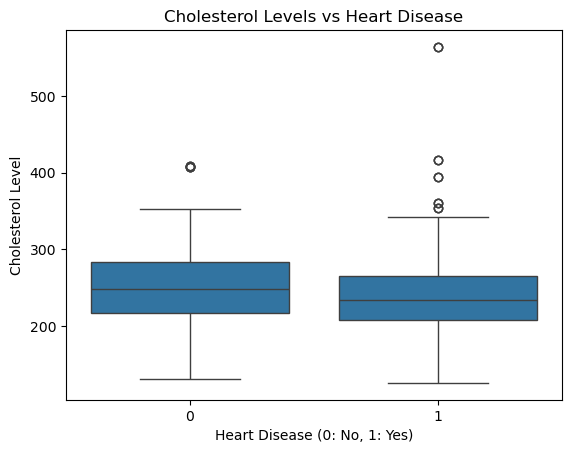

In [229]:
#Relationship between cholesterol levels and the likelihood of heart disease
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

target    No   Yes
age               
29       0.0   4.0
34       0.0   6.0
35       7.0   8.0
37       0.0   6.0
38       4.0   8.0
39       4.0  10.0
40       8.0   3.0
41       3.0  29.0
42       4.0  22.0
43      11.0  15.0
44      10.0  26.0
45       6.0  19.0
46      11.0  12.0
47       8.0  10.0
48      11.0  12.0
49       8.0   9.0
50       9.0  12.0
51      10.0  29.0
52      15.0  28.0
53       8.0  18.0
54      21.0  32.0
55      20.0  10.0
56      22.0  17.0
57      36.0  21.0
58      44.0  24.0
59      31.0  15.0
60      27.0  10.0
61      28.0   3.0
62      24.0  13.0
63      23.0   9.0
64      15.0  19.0
65      15.0  12.0
66      11.0  14.0
67      22.0   9.0
68       6.0   6.0
69       3.0   6.0
70      11.0   3.0
71       0.0  11.0
74       0.0   3.0
76       0.0   3.0
77       3.0   0.0


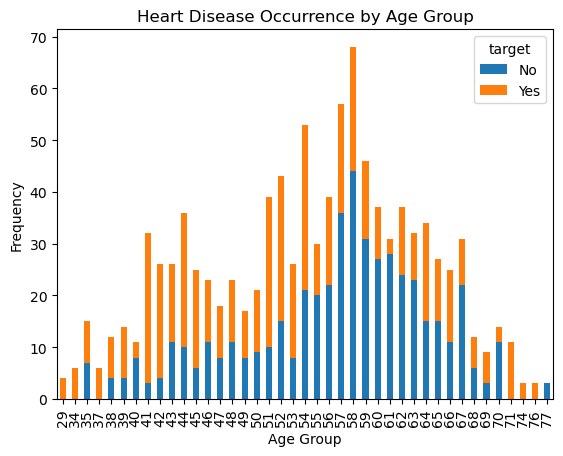

In [182]:
#age group has the highest occurrence of heart disease
age_group_heart_disease = df.groupby('age')['target'].value_counts().unstack().fillna(0)
print(age_group_heart_disease)
age_group_heart_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease Occurrence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

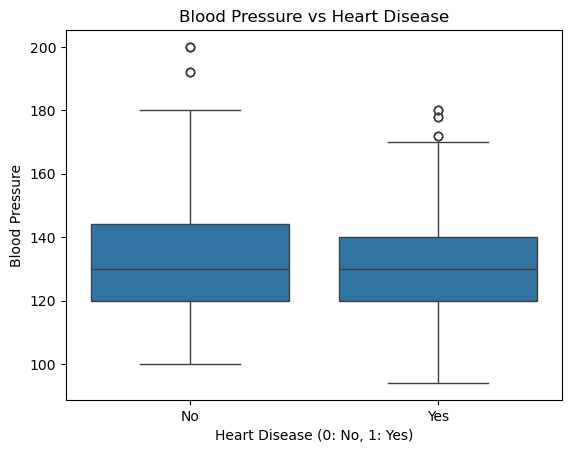

In [188]:
# Blood pressure vs heart disease occurrence
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Blood Pressure')
plt.show()

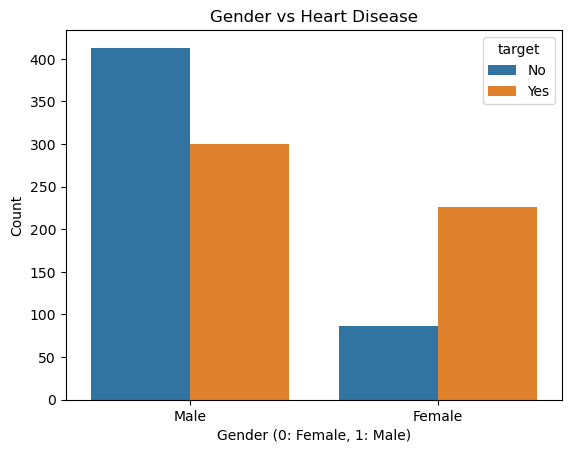

In [190]:
#Males or females show a higher tendency towards heart disease
sns.countplot(x='sex', hue='target', data=df)
plt.title('Gender vs Heart Disease')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

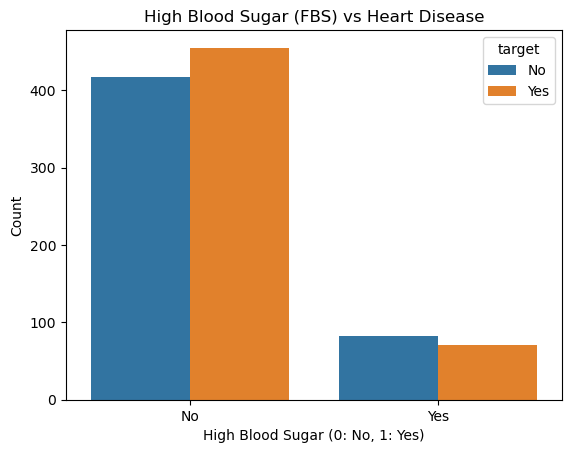

In [194]:
#High blood sugar correlate with heart disease prevalence
sns.countplot(x='fbs', hue='target', data=df)
plt.title('High Blood Sugar (FBS) vs Heart Disease')
plt.xlabel('High Blood Sugar (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

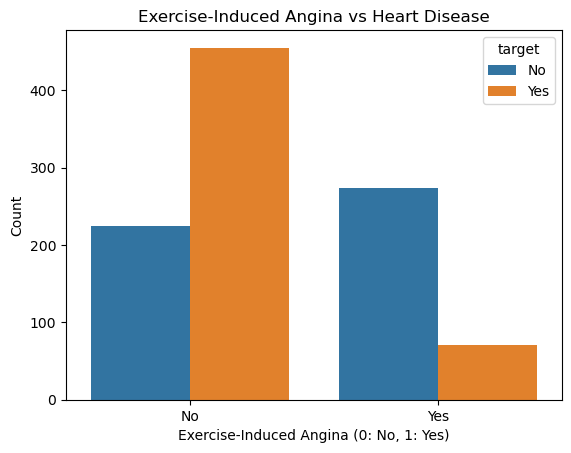

In [196]:
#Exercise level vs heart disease
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

             age      chol    target
age     1.000000  0.219823 -0.229324
chol    0.219823  1.000000 -0.099966
target -0.229324 -0.099966  1.000000


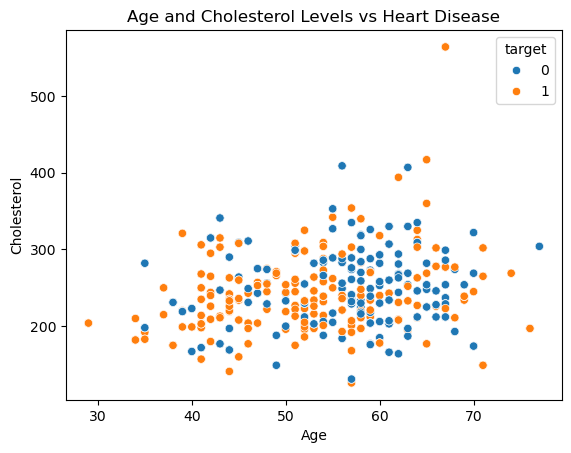

In [227]:
#Age and cholesterol levels on the likelihood of having heart disease
correlation = df[['age', 'chol', 'target']].corr()
print(correlation)
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title('Age and Cholesterol Levels vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()